# Machine Learning Algorithm

### Setup
1. Importing relevant libraries
2. Importing the Dataset

### Manual
1. Search for DISCUSS to see what we could discuss 
2. and search for HELP! to help me :)

In [11]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sn


In [39]:
import math

In [3]:
#import plotly.express as px

In [9]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


# What do we want to do
### 1. ML Regression for tree growth
We will need a ML Regression to determine how much a tree (of a specific type will approximately grow within a year.)
Important for us it the volume of the wood a tree gains per year.

For that we have a look at the tree types and ages and calculate how much volume a tree gains per year.

### 2. CO2 Absorption
Knowing how much a tree will grow, we can use a formula to calculate the trees approx. CO2 absorption per year


Let's have a look at the Data:

In [7]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [8]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Regression
### 1. Split into groups by tree type
And Check how many different trees there are


In [ ]:
### How may different tree types are there 
print(df['Baumart deutsch'].nunique())

In [50]:
### How may different Botanische Gattungen are there 
# DISCUSS: Maybe we should use the gattung, so we have more datapoints per grou1
print(df['Gattung botanisch'].nunique())

63


In [14]:
### What are their names
print(df['Baumart deutsch'].unique())

['Gemeine Rosskastanie' 'Amerikanische Rot-Eiche' 'Winter-Linde'
 'Sand-Birke' 'Ahornblättrige Platane' 'Spitz-Ahorn' 'Flatter-Ulme'
 'Berg-Ahorn, Weiss-Ahorn' 'Silber-Ahorn' 'Silber-Linde'
 'Hängende Silber-Linde' "Scheinakazie 'Bessoniana'" 'Robinie'
 'Rotblühende Rosskastanie' 'Kaiser-Linde' 'Sommer-Eiche, Stiel-Eiche'
 'Oxelbeere, Schwedische Mehlbeere' 'Echte Mehlbeere'
 'Großblättrige Robinie' 'Birken-Pappel' 'Schwarz-Pappel'
 "Schwarz-Ahorn 'Faassen's Black'" 'Gemeine Kiefer, Wald-Kiefer'
 'Feld-Ahorn' 'Rot-Buche' "Spitz-Ahorn 'Schwedleri'" 'Gewöhnliche Esche'
 'Krim-Linde' 'Roter Spitzahorn' 'Pflaumenblättriger Weiss-Dorn'
 'Holländische Linde' 'Flügelnuss' 'Japanischer Schnurbaum' 'Platane'
 'Dreidorniger Lederhülsenbaum' 'Sommer-Linde' 'Echter Rotdorn'
 'Baum-Hasel' "Winter-Linde 'Greenspire'" 'Amerikanische Linde'
 'Blumen-Esche' 'Italienische Pyramiden-Pappel' "Winter-Linde 'Roelvo'"
 'Schwarznuss' 'Berliner Lorbeer-Pappel' 'Pyramiden-Eiche' 'Hainbuche'
 'Fächerblattbaum' "

In [17]:
df['Baumart deutsch'].value_counts()

Winter-Linde                           59048
Spitz-Ahorn                            46494
Sommer-Eiche, Stiel-Eiche              24106
Ahornblättrige Platane                 22692
Sommer-Linde                           17682
                                       ...  
Hybrid-Eberesche                           1
Süsskirsche 'Büttners Rote Knorpel'        1
Schwarz-Erle 'Imperialis'                  1
Higan-Kirsche                              1
Flieder                                    1
Name: Baumart deutsch, Length: 513, dtype: int64

<AxesSubplot:xlabel='Standalter'>

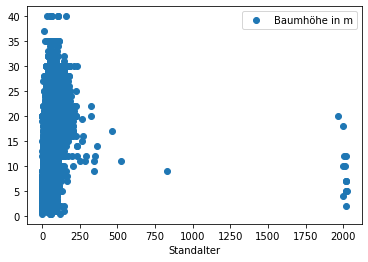

In [58]:
### Create a plot to visualize the Data
df.plot(x='Standalter', y='Baumhöhe in m', style='o')

In [59]:
### I want to get rid of the outlyer
df = df[df.Standalter < 1000]

<AxesSubplot:xlabel='Standalter'>

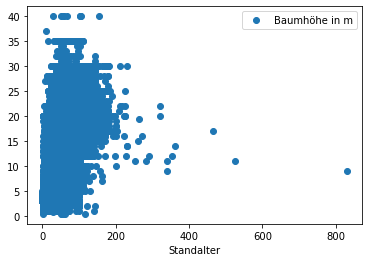

In [60]:
df.plot(x='Standalter', y='Baumhöhe in m', style='o')

## We need to do the same for the **Girth** of the tree, because it's Volume is important :)


<AxesSubplot:xlabel='Standalter'>

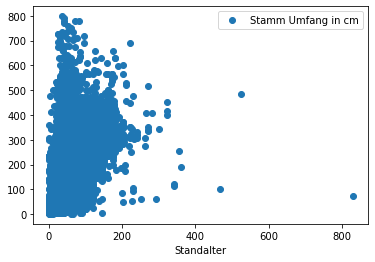

In [62]:
df.plot(x='Standalter', y='Stamm Umfang in cm', style='o')

I think it looks good

# Add a new column with the value Volume
In this calculation the tree is considered a cylinder.
For the new column we use the formula:
### Volume = π x radius\*2 x height 
But since we don't have the raduis we must use the girth
### Volume = π x (grith / 2π)\*2 x heigth
I don't want to import any additonal stiff so I just use the number 3.141592653589793 instead of π
We need to divide the girth by 100 so that it is also in meters

In [64]:
# df_Linde['tree volume'] = 3.141592653589793*(("Stamm Umfang in cm"/2*3.141592653589793)**2) * "Baumhöhe in m" 
 # df_Linde.dtypes
df['tree volume in m2'] = 3.141592653589793*(((df["Stamm Umfang in cm"]/100)/2*3.141592653589793)**2) * df["Baumhöhe in m"] 
 
df.head()

/var/folders/fr/0j1782qn30lgn572601l_yg00000gq/T/ipykernel_3300/2952397417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tree volume in m2'] = 3.141592653589793*(((df["Stamm Umfang in cm"]/100)/2*3.141592653589793)**2) * df["Baumhöhe in m"]


,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,tree volume in m2
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,470.719464
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,663.243637
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,169.526818
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,609.137684
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,408.191431


## Visualization of the tree volume and age


<AxesSubplot:xlabel='Standalter'>

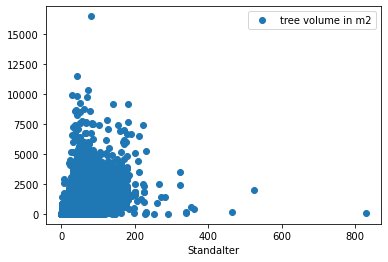

In [65]:
df.plot(x='Standalter', y='tree volume in m2', style='o')
## DISCUSS should we exlude the outlier with more than 7000m2 volume?

In [66]:
### If ypu want to drop it, run this:
max_volume = df['tree volume in m2'].idxmax()
outlyer_volume = df.loc[[max_volume]]
print(outlyer_volume)
#df_Linde.drop([227894], axis=0, inplace=True)

       Unnamed: 0                 ID Baum Nr. Objektnr.   Objektname  \
66255       66255  00008100:001f5ccd       24    11SB02  Arnimstraße   

      Baumart deutsch Baumart botanisch Gattung botanisch       Straße  \
66255  Schwarz-Pappel     Populus nigra           POPULUS  Arnimstraße   

      Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  Krone Durchmesser in m  \
66255       0              0        1940          82                    23.0   

       Stamm Umfang in cm  Baumhöhe in m       Bezirk  tree volume in m2  
66255               780.0           35.0  Lichtenberg       16506.191391  


## Decision on the method

**Decision:** To me it looks like we can use a **linear regression**

# But

HELP! Problem: Not the estimated volume in the next year is relevant but the difference between the volume from one year to the next

I will continue anyways and hope that I will have an idea later on.

# Let's try k-Nearest Neighbors for Regression first

But maybe in another notebook, so I will write a new csv file with our additional column

In [68]:
df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,tree volume in m2
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,470.719464
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,663.243637
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,169.526818
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,609.137684
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,408.191431


In [69]:
df.to_csv('additional_column_volume.csv')